# Modeling Wine Price with Written Reviews

David Dunham (dd567), Jeremy Kline (jbk227), and Guofeng Shi (gs522)

INFO 1998 Final Project / Fall 2018

In this project, we analyze a data set consisting of 130,000 wine reviews taken from Wine Enthusiast magazine. The data set covers a wide range of wines, mostly concentrated on California and France. The reviews consist of a point score ranging from 80 (worst) to 100 (best) and a brief text (approx. 50 words) describing the wine and explaining the taster's judgment. Additionally, the data set contains the price of each wine, along with certain geographic information (e.g. 'country,' 'province,' 'region,' and 'winery'). Here, we use the sentiment analysis tool TextBlob to generate numerical scores for both the sentiment and subjectivity of each review. We then use several regression models in a stacked ensemble approach to examine the correlation to the target variable 'price.' Our research question is the following: Do the subjective opinions of experts, as expressed in these machine-generated text analysis scores, show some correlation to the price of wines in the marketplace? If a positive correlation exists, this may suggest that expert sentiment generally coheres with that of the general public and may be a useful tool in predicting a wine's profitability.

Examples of wine reviews:

"Fans of ripe, sweet fruit will love this Pinot. It's huge in juicy raspberry and cherry, with spicy hints of Dr. Pepper and red licorice. It will be fun to see how the wine evolves over the next 6–8 years." Sentiment:0.258, Subjectivity: 0.392 

"Mouthwatering, high-toned acidity and a pleasant lemon-lime bitterness keeps the honeyed apple characteristics of this semisweet style Riesling in balance. Elegant mineral and petrol notes lead to a lingering, puckery finish." Sentiment: 0.617, Subjectivity: 0.983

Our data set was uploaded to Kaggle by user Olivier Goutay: https://www.kaggle.com/olivierg13/wine-ratings-analysis-w-supervised-ml/data

NOTE: The following project was written in Python 3.7. Previous versions may not run correctly.

# Stage 1: Preprocessing

1.1 Load Data Set and Generate Sentiment Scores

After loading the data set, we use TextBlob to generate Sentiment and Subjectivity scores for each wine. The Sentiment score ranges from -1 (most negative) to 1 (most positive) with 0 being neutral. The Subjectivity score ranges from 0 (most objective) to 1 (most subjective). TextBlob contains a Python library based on Stanford NLTK, which generates these scores on the basis of data trained from movie reviews. Here, we assign the Sentiment and Subjectivity values to two additinonal columns in our data set and save a new CSV file.

In [1]:
#Analyzing same sentences again using TextBlob
from textblob import TextBlob
import pandas as pd
import numpy as np

df = pd.read_csv("winemag-data-130k-v2.csv")
reviews = df['description'].values
sentiments = np.zeros(df.shape[0])
subjectivity = np.zeros(df.shape[0])
for i in range(0, len(df['description'])):
    sentiments[i]=TextBlob(reviews[i]).sentiment.polarity
    subjectivity[i]=TextBlob(reviews[i]).sentiment.subjectivity

df['Sentiment'] = pd.Series(sentiments, index = df.index)
df['Subjectivity'] = pd.Series(subjectivity, index = df.index)

In [2]:
#SAVE POINT. DO NOT RUN AGAIN.
df.to_csv("winereviews_130k_v3.csv")

1.2 Cleaning Data

The data set does not contain many empty cells, but they do exist in each feature. For categorical data, we filled these empty cells with 'none.' For numerical data, we inserted the mean value of the data in that column. Lastly, we removed any duplicates that may exist in the set.

In [3]:
#CLEAN EMPTY DATA
import pandas as pd
import numpy as np

df = pd.read_csv('winereviews_130k_v3.csv')

#For the categorical columns, fill blanks with 'None.'
df['country'].fillna('None', inplace=True) #The following is categorical data, to be filled with 'none.' 
df['designation'].fillna('None', inplace=True)
df['province'].fillna('None', inplace=True)
df['variety'].fillna('None', inplace=True)
df['winery'].fillna('None', inplace=True)
df['taster_name'].fillna('None', inplace=True)
df['taster_twitter_handle'].fillna('None', inplace=True)
df['points'] = df['points'].fillna(int(df['points'].mean())) #Numerical data is filled with the mean.
df['price'] = df['price'].fillna(int(df['price'].mean()))

#Remove duplicates
df.drop_duplicates(inplace=True)

1.3 Outliers

After examining the distribution of data in our target feature 'price,' we found outliers to be a major issue. The average price of a wine is 31 dollars, but the most expensive wine costs 3300 dollars. To eliminate these outliers, we removed all wines costing above $100. This constitutes only 3 percent of the original set, but significantly reduces the range of possible prices.

In [4]:
#REMOVE OUTLIERS
df = df[df.price < 100]

# Stage 2: Visualization

2.1 Wine Prices in Each Country

In our first visualization, we created a boxplot showing the range of prices for each country's wine. This shows that the median values of wines for each country are roughly 20 to 40 dollars, which suggests that a wine's country of origin alone may not be a strong predictive factor in price.

In [5]:
#PLOT 1
#PLOT DISTRIBUTION OF WINE PRICES IN EACH COUNTRY
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='country', y='price', data=df)
plt.xticks(fontsize=20, rotation=90) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
plt.xlabel('country',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.suptitle('Wine Prices',fontsize=30)

Text(0.5,0.98,'Wine Prices')

2.2 Correlations to Price

Here, we generate three plots showing the relationship of 'points' (reviewer's score), 'sentiment' and 'subjectivity' to wine prices. All plots were generated using Seaborn. In the first case, the plot is a type of heatmap, which clearly shows a positive correlation of points to price. Unfortunately, the scores for sentiment and subjectivity do not show a strong correlation. In these last two charts, we show a kind of scatterplot with the addition of a regression line for the data. In the case of sentiment, not only does the data fail to show a positive correlation to price, but it even shows a slight negative direction. In the case of subjectivity, there is apparently almost no correlation whatsoever. 

This result suggests that the TextBlob sentiment analysis tool was ineffective in demonstrating a link to price, probably due to the tool being trained on an entirely different kind of text data. However, this does not necessarily suggest that the two scores are useless for a machine learning approach, since even a small correlation may assist a properly trained model, whether that correlation is positive or negative.

NOTE: The plots below may take time to load.

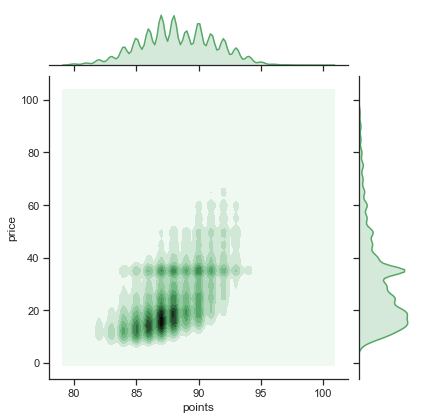

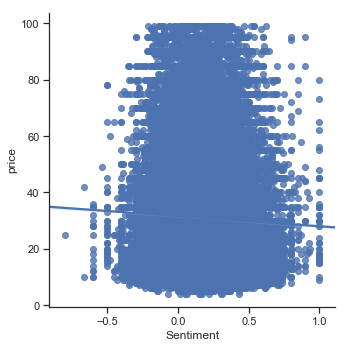

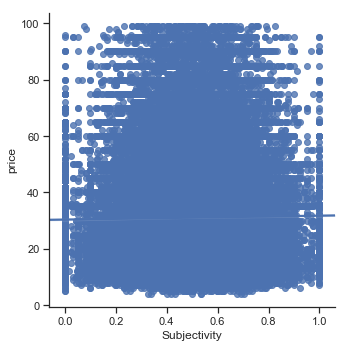

In [6]:
#PLOTS 2-4
#THE CORRELATION OF WINE POINTS AND PRICE
sns.set(style="ticks")
sns.jointplot(x='points',y='price',kind='kde',color='g',data=df)
plt.savefig('nltk_score_correlation.png',bbox_inches='tight')

#THE CORRELATION OF WINE SENTIMENT AND PRICE
sns.lmplot(x='Sentiment', y='price',data=df)

#THE CORRELATION OF WINE SUBJECTIVITY AND PRICE
sns.lmplot(x='Subjectivity', y='price',data=df)
#Hypothesis: Wine reviewers give higher point value to wines that they recognize will have wide appeal, but are equally likely to speak favorably about an average price wine.

2.3 Which Tasters Have the Strongest Influence?

In the barchart below, we examine the ten reviewers who have written the largest number of reviews for the website. We then generate a unique score for each individual based on the correlation of their wine point scores to the price of the wines that they reviewed. The result shows some degree of variation in taster 'influence.' Considering that all tasters review each wine under blind conditions, it is possible that some reviewers' tastes privilege expensive wines over less expensive ones. However, this difference is not so large to offer a predictive potential to this measurement.

Text(0.5,0.98,'Taster Point/Price Correlation')

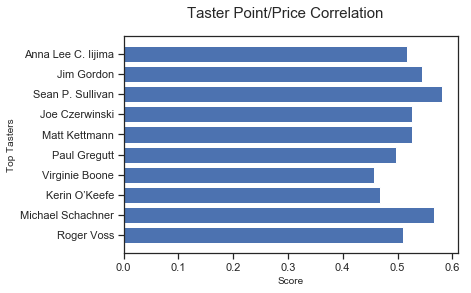

In [7]:
#PLOT 5
#VISUALIZATION OF THE RELATIVE CORRELATIONS OF POINTS AND PRICE FOR THE TOP TASTERS.
from scipy import stats
import scipy as sc
import matplotlib.pyplot as plt

#Find correlation coefficients of price vs points for each of the top tasters.
top_tasters = ["Roger Voss","Michael Schachner","Kerin O’Keefe","Virginie Boone","Paul Gregutt","Matt Kettmann","Joe Czerwinski","Sean P. Sullivan","Jim Gordon","Anna Lee C. Iijima"]
top_taster_correlations = [top_tasters.copy(),top_tasters.copy()]
for i in range(0, len(top_tasters)):
    top_taster_correlations[1][i] = sc.stats.pearsonr(df.loc[df['taster_name'] == top_tasters[i]]['points'].values,df.loc[df['taster_name'] == top_tasters[i]]['price'].values)
for i in range(len(top_taster_correlations[1])):
    top_taster_correlations[1][i] = top_taster_correlations[1][i][0]

xticks = list(range(0,len(top_taster_correlations[1])))
xticks = [1*x for x in xticks]
plt.barh(xticks,top_taster_correlations[1], tick_label = top_taster_correlations[0])
plt.xlabel('Score',fontsize=10)
plt.ylabel('Top Tasters',fontsize=10)
plt.suptitle('Taster Point/Price Correlation',fontsize=15)



# Stage 3: Encoding and Scaling

3.1 Categorical Grouping

Before we can create a model for our data, we first needed to encode our categorical data into numerical form. Since our data set is very large and the categories are not evenly represented throughout the set (i.e. a small number of wineries, countries, and regions constitute the majority of wines), sklearn's LabelEncoder was not an option. Instead, we chose to use OneHotEncoder, which generates a numeric array for each category in a feature. This process, however, increases the size of the data set by generating additional columns for each new category. Thus, it was impossible for us to encode all categories, since our data contains hundreds of unique categories.

To solve this encoding challenge, we retained 8-10 of the most frequent categories for each categorical feature and grouped all other infrequent categories under the label 'other.' Therefore, we were able to encode categories that occur most frequently and did not need to exclude this information from analysis.

In the steps below, we generate a series of new columns for the grouped data. We then apply OneHotEncoder on these columns and later discard the original columns prior to analysis.

In [8]:
#Create new column 'Top Varieties' in which less common varieties are classified as 'other'
top_varieties = ['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah']
variety_values = df['variety'].values

varieties = np.array([' '*max([len(item) for item in top_varieties])for i in range(df.shape[0])])
for i in range(0, len(df['variety'])):
    if variety_values[i] not in top_varieties:
        varieties[i] = 'other'
    else:
        varieties[i] = variety_values[i]

df['top varieties'] = pd.Series(varieties, index = df.index)

In [9]:
#Repeat step for 'country' and reduce number of categories.
top_countries = ["US", "France","Italy","Spain","Portugal","Chile","Argentina","Austria","Germany","New Zealand","South Africa"]
country_values = df['country'].values

countries = np.array([' '*max([len(item) for item in top_countries]) for i in range(df.shape[0])])
for i in range(0, len(df['country'])):
    if country_values[i] not in top_countries:
        countries[i] = 'other'
    else:
        countries[i] = country_values[i]

df['top countries'] = pd.Series(countries, index = df.index)

In [10]:
#Repeat step for 'taster_name' and reduce number of categories.
top_tasters = ["Roger Voss","Michael Schachner","Kerin O’Keefe","Virginie Boone","Paul Gregutt","Matt Kettmann","Joe Czerwinski","Sean P. Sullivan","Jim Gordon","Anna Lee C. Iijima"]
taster_values = df['taster_name'].values

tasters = np.array([' '*max([len(item) for item in top_tasters]) for i in range(df.shape[0])])
for i in range(0, len(df['taster_name'])):
    if taster_values[i] not in top_tasters:
        tasters[i] = 'other'
    else:
        tasters[i] = taster_values[i]

df['top tasters'] = pd.Series(tasters, index = df.index)


In [11]:
#Repeat step for 'province' and reduce number of categories.
top_provinces = ['California','Washington','Bordeaux','Tuscany','Oregon','Burgundy','Northern Spain','Piedmont']
province_values = df['province'].values

provinces = np.array([' '*max([len(item) for item in top_provinces]) for i in range(df.shape[0])])
for i in range(0, len(df['province'])):
    if province_values[i] not in top_provinces:
        provinces[i] = 'other'
    else:
        provinces[i] = province_values[i]
        
df['top provinces'] = pd.Series(provinces, index = df.index)


In [12]:
#Repeat step for 'winery' and reduce number of categories.
top_wineries = ['Wines & Winemakers','Testarossa','DFJ Vinhos','Williams Selyem','Louis Latour','Georges Duboeuf','Chateau Ste. Michelle','Concha y Toro','Columbia Crest','Kendall-Jackson']
wine_values = df['winery'].values

wineries = np.array([' '*max([len(item) for item in top_wineries]) for i in range(df.shape[0])])
for i in range(0, len(df['winery'])):
    if wine_values[i] not in top_wineries:
        wineries[i] = 'other'
    else:
        wineries[i] = wine_values[i]

df['top wineries'] = pd.Series(wineries, index = df.index)

3.2 One Hot Encoding

After grouping categorical data in the above step, we then had five additional columns for each grouped categorical feature. Next, we applied one hot encoding on those new columns.

After running the code below, the data set is expanded to include new columns for each of the categories in the "top" lists above. If the wine matches one of these top categories or 'other,' then it contains a 1 value for that category; otherwise, the value is 0.

In [13]:
#ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

#Encode wine variety column
one_hot_feature = enc.fit_transform(df['top varieties'].values.reshape(-1, 1)).toarray()
varieties_column = ['variety_'+str(i) for i in range(len(top_varieties)+1)]
for i in range(len(varieties_column)):
    df[varieties_column[i]]=pd.Series(one_hot_feature[:,i], index = df.index)
    
#Encode country column
one_hot_feature = enc.fit_transform(df['top countries'].values.reshape(-1,1)).toarray()                                
country_column = ['country_'+str(i) for i in range(len(top_countries)+1)]
for i in range(len(country_column)):
    df[country_column[i]]=pd.Series(one_hot_feature[:,i], index = df.index)

#Encode taster name column
one_hot_feature = enc.fit_transform(df['top tasters'].values.reshape(-1,1)).toarray()                                
tasters_column = ['taster_'+str(i) for i in range(len(top_tasters)+1)]
for i in range(len(tasters_column)):
    df[tasters_column[i]] = pd.Series(one_hot_feature[:,i], index = df.index)

#Encode province column
one_hot_feature = enc.fit_transform(df['top provinces'].values.reshape(-1,1)).toarray()   
provinces_column = ['province_'+str(i) for i in range(len(top_provinces)+1)]
for i in range(len(provinces_column)):
    df[provinces_column[i]] = pd.Series(one_hot_feature[:,i], index = df.index)

#Encode winery column
one_hot_feature = enc.fit_transform(df['top wineries'].values.reshape(-1,1)).toarray() 
wineries_column = ['winery_'+str(i) for i in range(len(top_wineries)+1)]
for i in range(len(wineries_column)):
    df[wineries_column[i]] = pd.Series(one_hot_feature[:,i], index = df.index)

#Store list of top category names to be used later.
names = [top_varieties,top_countries,top_tasters,top_provinces,top_wineries]
df.head(25)

ValueError: could not convert string to float: 'other'

3.3 Scaling

After addressing the categorical data, we turned our attention to the numerical features (points, Sentiment, Subjectivity). Each of these features contains data within different ranges, so we scaled each of these features using MinMaxScaler. This takes the range of values in a column and assigns 1 to the highest value and 0 to the lowest. Thus, all the data in that column lies between 0 and 1, allowing for more accurate modeling of these features.

In [14]:
#SCALE CONTINUOUS DATA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['points','Sentiment','Subjectivity']] = scaler.fit_transform(df[['points','Sentiment','Subjectivity']])

#Remember: The target variable 'price' should never be scaled.

# Stage 4: Modeling

4.1 Dropping Irrelevant Data Features

Before a model can be generated, we dropped all columns that cannot be processed in a regression model. This includes certain features that we chose not to encode, such as the taster's twitter handle, but also those columns such as 'top tasters' that were generated in the process of one hot encoding.

In [15]:
#If we cannot transform categories into continuous data, then we will exclude from the model.
#Additionally, we removed columns previously created as step in reducing the number of categories.

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('description', axis=1)
df = df.drop('designation', axis=1)
df = df.drop('winery', axis=1)
df = df.drop('country', axis=1)
df = df.drop('province', axis=1)
df = df.drop('region_1', axis=1)
df = df.drop('region_2', axis=1)
df = df.drop('taster_name', axis=1)
df = df.drop('taster_twitter_handle', axis=1)
df = df.drop('title', axis=1)
df = df.drop('variety', axis=1)
df = df.drop('top varieties',axis=1)
df = df.drop('top tasters', axis=1)
df = df.drop('top provinces',axis=1)
df = df.drop('top countries',axis=1)
df = df.drop('top wineries',axis=1)
df.head(10)

,points,price,Sentiment,Subjectivity
0,0.35,35.0,0.518519,0.733333
1,0.35,15.0,0.566667,0.460000
2,0.35,14.0,0.458333,0.358333
3,0.35,13.0,0.537037,0.333333
4,0.35,65.0,0.614815,0.448718
5,0.35,15.0,0.459259,0.450000
6,0.35,16.0,0.566667,0.330000
7,0.35,24.0,0.457407,0.315000
8,0.35,12.0,0.583333,0.700000
9,0.35,27.0,0.622685,0.566667


4.2 Run Linear Model and Examine Feature Coefficients

In this first model, we implemented a simple linear regression model to see the coefficient values assigned to each feature variable. Since we have already scaled this data set, the coefficients give us a sign of the positive or negative correlation of each feature to our target variable. To do this, we implemented a cross-validation of the model using only the training set. Consequently, we could generate cross-validation scores and get an intuition for the model's accuracy through the mean of its values.

In dealing with the issue of collinearity, we first attempted to remove one column from each of the categorical variables (in this case, the fifth column). Then, after fitting the linear model, we could see the differentiation between coefficients much more easily. Previously, the differences between coefficients were much more obscured because  the sum of each series of categorical features sums up to 1.

The coefficient results seem to confirm the intuitions suggested in the visualizations above. The first feature 'points' presents the strongest evidence of correlation, while 'Sentiment' actually offers a negative correlation. Moreover, specific geographical information, such as winery, offered better prediction of price than general information, such as country.

In [16]:
#MODEL 1: LINEAR REGRESSION AND FEATURE COEFFICIENTS
#This part shows the coefficients of each feature in a linear model. The first feature 'points' has the highest value.
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from copy import deepcopy

#Removing certain collinear variables improves accuracy of the coefficients.
X = df.drop('variety_5', axis=1)
X = X.drop('country_5', axis =1)
X = X.drop('taster_5', axis =1)
X = X.drop('province_5', axis =1)
X = X.drop('winery_5', axis =1)

#Split training set
X = X.drop('price', axis=1)
y = df['price']
xTr,xTe,yTr,yTe = train_test_split(X,y,test_size=0.1,random_state=42)

#Cross-validation of linear model.
model = LinearRegression()
cross_scores = cross_val_score(model,xTr,yTr,cv=KFold(n_splits=30, shuffle=True, random_state=42),scoring='r2')

#Update list of category names after collinear variables removed.
names2 = deepcopy(names) #Copy list before eliminating data
for i in range(len(names2)):
    names2[i].append('Other') #Add 'other' category to end of list for each feature.
    names2[i].remove(names2[i][5]) #Remove the fifth category of each list (See above)
names2 = sum(names2, [])
names2 = ['NA', 'NA', 'NA'] + names2 #Insert NA for points, sentiment, subjectivity.

#Generate a new Dataframe consisting of the features and their coefficients
labels = np.array(X.columns.values)
coefficients = np.array(model.fit(xTr,yTr).coef_)
coef_results = pd.DataFrame({'Features': labels, 'Coefficients': coefficients, 'Names': np.array(names2)})

print(coef_results)

print('Cross-Validation Scores: ',cross_scores)
print('Test Score: ',cross_scores.mean())

KeyError: "labels ['variety_5'] not contained in axis"

In addition to the above approach, we also viewed the coefficients after removing 'country.' This might also reduce the problem of collinearity because country data is always correlated with the other categorical features of province and winery. The results support the observation that 'points,' 'winery,' and 'province' offered the strongest positive correlation to price. 

Here, we use the model Ridge because, when doing least squares regression, we noticed some numerical overflow issues that a linear model could not solve. Previously, our coefficient scores were inordinately large numbers. This was due to the removal of the feature 'country,' which resulted in the data becoming more collinear, since a larger fraction of the total data was onehotencoded. One effect of the Ridge model was that these coefficients returned to their normal scale.

In [17]:
#MODEL 1: RIDGE REGRESSION AND FEATURE COEFFICIENTS
#This part shows the coefficients of each feature in a linear model. The first feature 'points' has the highest value.
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge
from copy import deepcopy

X = df.drop(country_column,axis=1)

#Split training set
X = X.drop('price', axis=1)
y = df['price']
xTr,xTe,yTr,yTe = train_test_split(X,y,test_size=0.1,random_state=42)

#Update list of category names after collinear variables removed.
names3 = deepcopy(names)
for i in range(len(names3)):
    names3[i].append('Other') #Add 'other' category to end of list for each feature.
names3.remove(names3[1]) #Remove the 'country' feature.
names3 = sum(names3, [])
names3 = ['NA', 'NA', 'NA'] + names3 #Insert NA for points, sentiment, subjectivity.

#Cross-validation of linear model.
model = Ridge(alpha=1)
cross_scores = cross_val_score(model,xTr,yTr,cv=KFold(n_splits=30, shuffle=True, random_state=42),scoring='r2')

#Generate a new Dataframe consisting of the features and their coefficients
labels = np.array(X.columns.values)
coefficients = np.array(model.fit(xTr,yTr).coef_)
coef_results = pd.DataFrame({'Features': labels, 'Coefficients': coefficients, 'Names': np.array(names3)})

print(coef_results)
print('Cross-Validation Scores: ',cross_scores)
print('Test score: ',cross_scores.mean())

NameError: name 'country_column' is not defined

4.3 Stacking

To produce the highest possible accuracy of our model, we engage in an ensemble stacking approach consisting of the following models:

Linear Regression: This model assumes a linear relationship between the dependent variable and each independent variable. It makes sense for us to use it, especially on the point ratings and sentiment scores, as those numeric values hopefully correlate with the price.

KNN Regression: KNN works by finding the K nearest neighbors to the point it is trying to predict and using those to make its prediction. This model could be effective given our intuition that 'close' wines often share similar charactersitics (For example, French wines might be of a similar taste and quality, thereby producing similar reviews). However, this approach is computationally expensive, and given the size of our data set, this step of the model may take up to 10 minutes to load.

Ridge Regression: Ridge is a regularization method for linear regression, which also may help reduce the problem of collinearity when performing least squares regression. Since we OneHotEncoded categorical data, we risk collinearity between the different categories of each feature. This means that the columns for country, for example, always sum to one and therefore would have similar weights. We choose this model because it compensates for some of the weaknesses of a linear model, since Ridge regression reduces the complexity of the data and helps prevent overfitting.

Decision Tree Regression: This model builds a decision tree for the data. This seems appropriate given the large amount of categorical data we have. It can compute results relatively quickly, especially for data that is not necessarily linear separable, as ours might be.

SGD Regression: This model uses Stochastic Gradient Descent to perform linear regression on the data. This is another data-efficient algorithm for linear regression and therefore fits well into our approach.

In [18]:
#STACKING AND CROSS-VALIDATION
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression

#Split training and test set
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.1, random_state=42)

#STEP 1: LINEAR MODEL
linear = LinearRegression()

#Generate model cross-validation scores
linear_scores = cross_val_score(linear,X_train,Y_train,cv=KFold(n_splits=30, shuffle=True, random_state=42))

#Generate model predictions
linear.fit(X_train,Y_train)
linear_train_pred = linear.predict(X_train)
linear_test_pred = linear.predict(X_test)

print('Linear Score: ', linear_scores.mean())

Linear Score:  0.292089308781


NOTE: The KNN step may take several minutes to load due to the number of computations required for our data set.

In [19]:
# STACKING STEP 2: KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =20)
knn_scores = cross_val_score(knn,X_train,Y_train,cv=KFold(n_splits=30, shuffle=True, random_state=42))
knn.fit(X_train,Y_train)
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

print('KNN Score: ', knn_scores.mean())

KNN Score:  0.285805177371


In [20]:
#STACKING STEP 3: RIDGE
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 5)
ridge_scores = cross_val_score(ridge,X_train,Y_train,cv=KFold(n_splits=30, shuffle=True, random_state=42))
ridge.fit(X_train,Y_train)
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

print('Ridge Score: ', ridge_scores.mean())

Ridge Score:  0.292088104817


In [21]:
#STACKING STEP 4: DECISION TREE
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42,min_samples_leaf=20,max_depth=10)

tree_scores = cross_val_score(tree,X_train,Y_train,cv=KFold(n_splits=30, shuffle=True, random_state=42))
tree.fit(X_train,Y_train)
tree_train_pred = tree.predict(X_train)
tree_test_pred = tree.predict(X_test)

print('Tree Score: ', tree_scores.mean())

Tree Score:  0.300744664177


In [22]:
#STACKING STEP 5: SGD
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

sgd_scores = cross_val_score(sgd,X_train,Y_train,cv=KFold(n_splits=30, shuffle=True, random_state=42))
sgd.fit(X_train,Y_train)
sgd_train_pred = sgd.predict(X_train)
sgd_test_pred = sgd.predict(X_test)

print('SGD Score: ', sgd_scores.mean())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/skl

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/skl

SGD Score:  0.291045015088


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [23]:
#FINAL STEP: 
linear_pred = linear_train_pred.reshape(-1,1)
knn_pred = knn_train_pred.reshape(-1,1)
ridge_pred = ridge_train_pred.reshape(-1,1)
tree_pred = tree_train_pred.reshape(-1,1)
sgd_pred = sgd_train_pred.reshape(-1,1)
pred_input = np.hstack([linear_pred, knn_pred, ridge_pred, tree_pred, sgd_pred])

stacked = LinearRegression()
stacked.fit(pred_input, Y_train)

pred_test = pd.DataFrame({'Linear': linear_test_pred.reshape(-1), 'knn': knn_test_pred.reshape(-1), 'ridge': ridge_test_pred.reshape(-1), 'Tree': tree_test_pred.reshape(-1), 'SGD': sgd_test_pred.reshape(-1)}, index=Y_test.index)

print('Stacked Score: ',stacked.score(pred_test, Y_test))



Stacked Score:  0.296125848495


# Conclusions

Given our final result of 0.45, this score seems satisfactory given the loose relationship of the data to the target variable. Out of the five models used above, cross-validation suggests that the KNN and Decision Tree methods would be most effective for this type of data, which seems unsurprising given the intuition that wines in closer proximity (whether geographically or otherwise) tend to have similar characteristics. 

Furthermore, our analysis of the coefficients in the linear regression model suggests that certain features are more correlated than others with the price of a wine. In particular, we note that specific geographic information, such as 'winery,' tends to be most positively correlated with price, whereas general categorical information, such as 'country,' is less correlated.

More significantly, the somewhat strong connection between 'points' and 'price' gives credibility to the hypothesis that expert opinion tends to privilege costlier wines. Unfortunately, however, the text analysis tools of TextBlob offered data with little correlation to our target variable. This result may be explained by the inadequacy of this sentiment analysis tool, since its library was not trained on the common vocabulary of wines. 